# Advanced Machine Learning Application - Assignment 3
## Data Product with Machine Learning
### Group 10
    - Archit Pradip Murgudkar : 14190286
    - Mahjabeen Mohiuddin : 24610507
    - Rohan Rocky Britto : 24610990
    - Smit Khatri : 24712248

We started off by bulk extracting the zip files in each of the subfolders (ATL, BOS etc.) using application like 7zip or Winrar that provide this feature.

## Importing required packages

In [1]:
import pandas as pd
from pathlib import Path
import os

Read all the files in the directory and create a merged dataframe

In [2]:
current_directory = os.getcwd()
parent_directory = Path(current_directory).parent.absolute()
raw_data_path = parent_directory / 'data/raw/itineraries_csv/'

In [3]:
df = pd.DataFrame({})

Concatenate the data from all the folders into the dataframe

In [4]:
for directory in os.listdir(raw_data_path):
    directory_path = raw_data_path / directory
    files = Path(directory_path).rglob('*.csv')
    
    df_temp = pd.DataFrame({})
    
    for file in files:
        df_file = pd.read_csv(file)
        df_temp = pd.concat([df_temp, df_file])
        
    df = pd.concat([df, df_temp])
    print(len(df_temp), 'rows of data from', directory, 'directory have been added to the dataframe')

874069 rows of data from ATL directory have been added to the dataframe
989175 rows of data from BOS directory have been added to the dataframe
854536 rows of data from CLT directory have been added to the dataframe
770429 rows of data from DEN directory have been added to the dataframe
896596 rows of data from DFW directory have been added to the dataframe
747751 rows of data from DTW directory have been added to the dataframe
699628 rows of data from EWR directory have been added to the dataframe
594215 rows of data from IAD directory have been added to the dataframe
688263 rows of data from JFK directory have been added to the dataframe
1352275 rows of data from LAX directory have been added to the dataframe
1021938 rows of data from LGA directory have been added to the dataframe
875288 rows of data from MIA directory have been added to the dataframe
527105 rows of data from OAK directory have been added to the dataframe
894646 rows of data from ORD directory have been added to the 

## Data analysis and cleaning

Check the shape of the dataframe

In [5]:
df.shape

(13519999, 23)

Checking the structure of the dataframe

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13519999 entries, 0 to 1355
Data columns (total 23 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   legId                              object 
 1   searchDate                         object 
 2   flightDate                         object 
 3   startingAirport                    object 
 4   destinationAirport                 object 
 5   travelDuration                     object 
 6   isBasicEconomy                     bool   
 7   isRefundable                       bool   
 8   isNonStop                          bool   
 9   totalFare                          float64
 10  totalTravelDistance                float64
 11  segmentsDepartureTimeEpochSeconds  object 
 12  segmentsDepartureTimeRaw           object 
 13  segmentsArrivalTimeEpochSeconds    object 
 14  segmentsArrivalTimeRaw             object 
 15  segmentsArrivalAirportCode         object 
 16  segmentsDepartureAirportC

Let us have a quick look at the sample data in the dataset

In [7]:
df.sample(5)

,legId,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
188,ed10e4b10f87e73c1f8a62e51e83c4b0,2022-05-09,2022-05-28,CLT,JFK,PT3H18M,False,False,False,180.10,...,1653753660||1653762180,2022-05-28T12:01:00.000-04:00||2022-05-28T14:2...,RDU||JFK,CLT||RDU,American Airlines||American Airlines,AA||AA,Airbus A321||Embraer 175,3360||6420,130||434,coach||coach
878,e866de97329134122902a3d89aee43f4,2022-04-30,2022-06-18,BOS,IAD,PT6H45M,False,False,False,327.60,...,1655587800||1655606640,2022-06-18T17:30:00.000-04:00||2022-06-18T22:4...,JFK||IAD,BOS||JFK,Delta||Delta,DL||DL,Airbus A220-100||Canadair Regional Jet 900,5460||5940,185||221,coach||coach
1004,abacf8f93acc1acc78c269899d784339,2022-04-27,2022-06-06,DFW,PHL,PT11H7M,False,False,False,370.20,...,1654575900||1654609620,2022-06-06T23:25:00.000-05:00||2022-06-07T09:4...,BHM||PHL,DFW||BHM,American Airlines||American Airlines,AA||AA,Embraer 175||Canadian Regional Jet 700,6300||8220,592||772,coach||coach
1030,2b5de291a97e3b3c17996561102e7608,2022-05-05,2022-06-19,DFW,SFO,PT9H50M,False,False,False,503.20,...,1655662860||1655689380,2022-06-19T11:21:00.000-07:00||2022-06-19T18:4...,PHX||SFO,DFW||PHX,American Airlines||American Airlines,AA||AA,Airbus A321||Airbus A319,8880||7200,872||652,coach||coach
98,47822c335b99d7f51b2348d36c714838,2022-05-08,2022-05-27,DEN,DFW,PT2H1M,False,False,True,203.98,...,1653678060,2022-05-27T14:01:00.000-05:00,DFW,DEN,Frontier Airlines,F9,NaN,7260,650,coach


Checking for null values in the dataset

In [8]:
df.isna().sum()

legId                                     0
searchDate                                0
flightDate                                0
startingAirport                           0
destinationAirport                        0
travelDuration                            0
isBasicEconomy                            0
isRefundable                              0
isNonStop                                 0
totalFare                                 0
totalTravelDistance                  959619
segmentsDepartureTimeEpochSeconds         0
segmentsDepartureTimeRaw                  0
segmentsArrivalTimeEpochSeconds           0
segmentsArrivalTimeRaw                    0
segmentsArrivalAirportCode                0
segmentsDepartureAirportCode              0
segmentsAirlineName                       0
segmentsAirlineCode                       0
segmentsEquipmentDescription         262676
segmentsDurationInSeconds                 0
segmentsDistance                     126985
segmentsCabinCode               

These features may not be used in our model as we may not be able to derive it from the input fields in streamlit. Hence, we will not be deleting or manipulating the data in them

Checking duplicate entries in the data

In [9]:
df.duplicated().sum()

0

<Axes: >

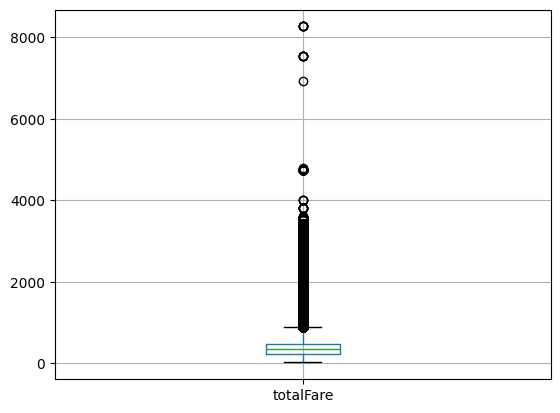

In [10]:
import matplotlib.pyplot as plt
df.boxplot(column='totalFare')

Outliers could be mostly those fares that are more than $4000. Let us check the number of trips that have such high fare.

In [11]:
len(df[df['totalFare']>4000])

75

There are only 75 such cases in the dataset. These could be genuine cases where the tickets are of first class or those that are searched very close to the flight date.

In [12]:
df[df['totalFare']>4000]['segmentsCabinCode'].str.contains('first').sum()

68

This confirms our hypothesis and hence, we won't discard these rows

Flight year, month and week number extracted from the flight date.

In [13]:
df['flightDate'] = pd.to_datetime(df['flightDate'])

df['flightYear'] = df['flightDate'].dt.year
df['flightMonth'] = df['flightDate'].dt.month
df['flightDay'] = df['flightDate'].dt.day
df['flightWeek'] = df['flightDate'].dt.isocalendar().week

The gap between the search date and flight date can be a major factor in determining the price of a flight. In production environment, search date would be the current date and would be easily available.

As the test will be performed on data of the past date, we will include a field for manually setting the search date that will only be available on test evironment.

In [14]:
df['searchGap'] = (pd.to_datetime(df['flightDate'])-pd.to_datetime(df['searchDate'])).dt.days

Save the merged dataset so that we do not have to perform merging again

In [15]:
df.to_csv('../data/raw/merged_dataset.csv', index=False)